This fictitious case study is based on a real-life study of election data. It allows you to explore a sample of data. Think carefully about what you see. Can you trust the results? What questions do you need to ask about the code and the data?

In [449]:
import os
import sys
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import operator
from ArchiveAnalysis import PersonAnalyser
from datetime import datetime, timedelta, timezone
import csv
import locale
import numpy as np
import pandas as pd
import copy

In [450]:
def plotYAgainstXAsBarChart(x_values, y_values, chart_title, x_axis_label, y_axis_label, vertical_labels):
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(111)
    bar_colors = ['tab:blue']
    
    ax.bar(x_values, y_values, color=bar_colors)
    ax.set_xlabel(x_axis_label)   
    ax.set_ylabel(y_axis_label)
    ax.set_title(chart_title)
    plt.xticks(range(len(x_values)), x_values, rotation='vertical' if vertical_labels else 'horizontal')
    
    plt.show()

In [451]:
def plotStackedBarChart(x_values, lists_of_y_values, category_labels, chart_title, x_axis_label, y_axis_label, vertical_labels):
    stacked_data = {}
    for i, label in enumerate(category_labels):
        stacked_data[label] = lists_of_y_values[i]
    width = 0.5
    
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(111)
    bottom = np.zeros(len(x_values))
    for category, count in stacked_data.items():
        p = ax.bar(range(len(x_values)), count, width, label=category, bottom=bottom)
        bottom += count
    
    ax.set_title(chart_title)
    ax.set_xlabel(x_axis_label)   
    ax.set_ylabel(y_axis_label)
    ax.legend(loc="upper right")
    plt.xticks(range(len(x_values)), x_values, rotation='vertical' if vertical_labels else 'horizontal')
    
    plt.show()

In [452]:
def plotAppearancesPerCategoryValue(category, categoryLabel, vertical_labels):
    """Function to plot the counts per value in the given category. categoryLabel is used in the graph titles"""
    categoryValues, counts = personAnalyser.countAppearancesPerColumnValue(category, "Date", sortColumn="Date")
    plotYAgainstXAsBarChart(
        categoryValues, 
        counts, "Number of appearances per %s"%categoryLabel, 
        categoryLabel.capitalize(), "Number of appearances", vertical_labels)  
    return categoryValues, counts

In [453]:
def plotAveragesPerCategoryValue(valueLabel, category, categoryLabel, vertical_labels):
    """Function to plot the averages of the values in the valueLabel column per value in the given category. 
    categoryLabel is used in the graph titles"""
    categoryValues, averages = personAnalyser.calculateAverageTimePerColumnValue(category, [valueLabel], sortColumn=valueLabel)
    plotYAgainstXAsBarChart(
    categoryValues, 
    averages[0], "Average %s per %s"%(valueLabel, categoryLabel), categoryLabel.capitalize(), "Average %s"%(valueLabel), vertical_labels)  
    return categoryValues, averages[0]

In [454]:
def plotTotalsPerCategoryValue(valueLabel, category, categoryLabel, vertical_labels):
    """Function to plot the totals of the values in the valueLabel column per value in the given category. 
    categoryLabel is used in the graph titles"""
    categoryValues, totals = personAnalyser.calculateTotalTimePerColumnValue(category, [valueLabel], sortColumn=valueLabel)
    plotYAgainstXAsBarChart(
    categoryValues, 
    totals[0], "Total %s per %s"%(valueLabel, categoryLabel), categoryLabel.capitalize(), "Total %s"%(valueLabel), vertical_labels)  
    return categoryValues, totals[0]

## Read in the data

In [455]:
appearances = pd.read_csv("appearances.csv", sep=';')
personAnalyser = PersonAnalyser.PersonAnalyser(appearances)
totalNumberOfAppearances = personAnalyser.countRowsInDataframe()
totalFaceTime = personAnalyser.getColumnTotal("Time face recognised (s)")
totalSpeakerTime = personAnalyser.getColumnTotal("Time voice recognised (s)")
totalTime = personAnalyser.getColumnTotal("Total time recognised (s)")
print(appearances)

    Unnamed: 0                                  Name Gender             Party  \
0            0  Veldhoven-van der Meer, Stientje van      V               D66   
1            1                        Zanen, Jan van      M               VVD   
2            2                       Dijkhoff, Klaas      M               VVD   
3            3                        Jonge, Hugo de      M               CDA   
4            4                        Blokhuis, Paul      M                CU   
..         ...                                   ...    ...               ...   
66          66                       Mos, Richard de      M       CODE ORANJE   
67          67                      Aboutaleb, Ahmed      M              PvdA   
68          68                        Wilders, Geert      M               PVV   
69          69                     Nanninga, Annabel      V  Fractie-Nanninga   
70          70                      Aboutaleb, Ahmed      M              PvdA   

           Party ideology  

## Number of appearances by a politician

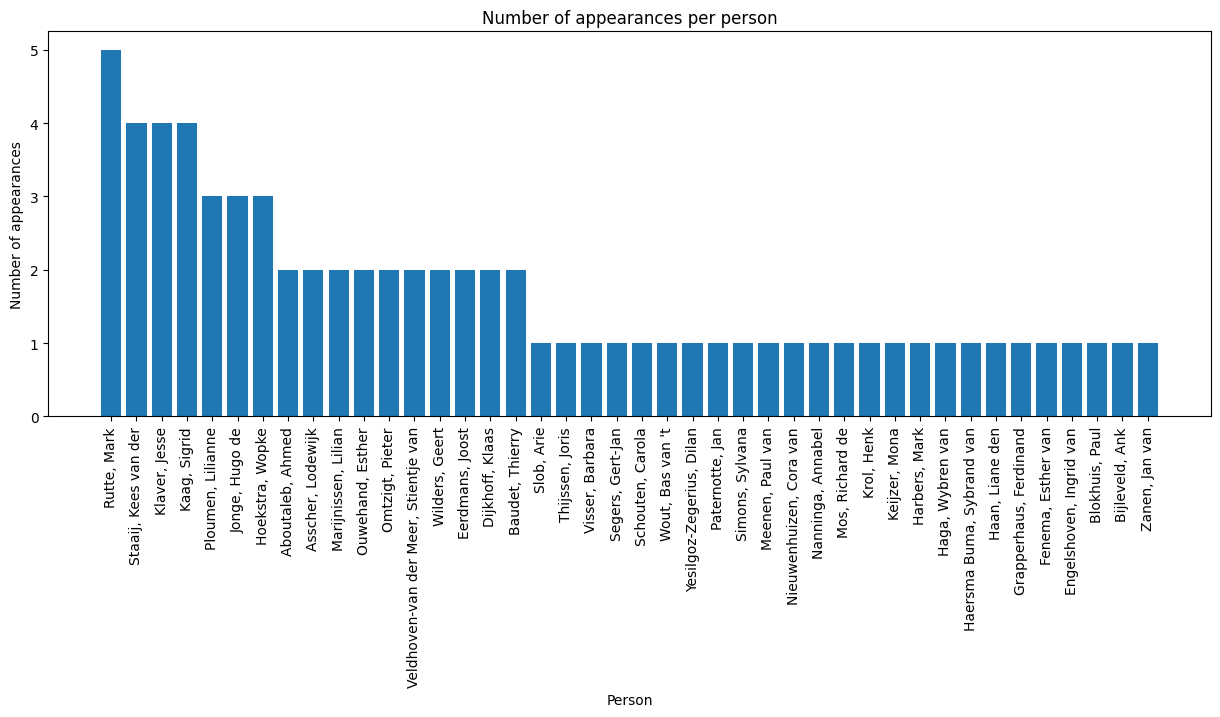

In [456]:
category = "Name"
categoryLabel = "person"
names, appearanceCounts = plotAppearancesPerCategoryValue(category, categoryLabel, True)

## Length of appearance time for politician

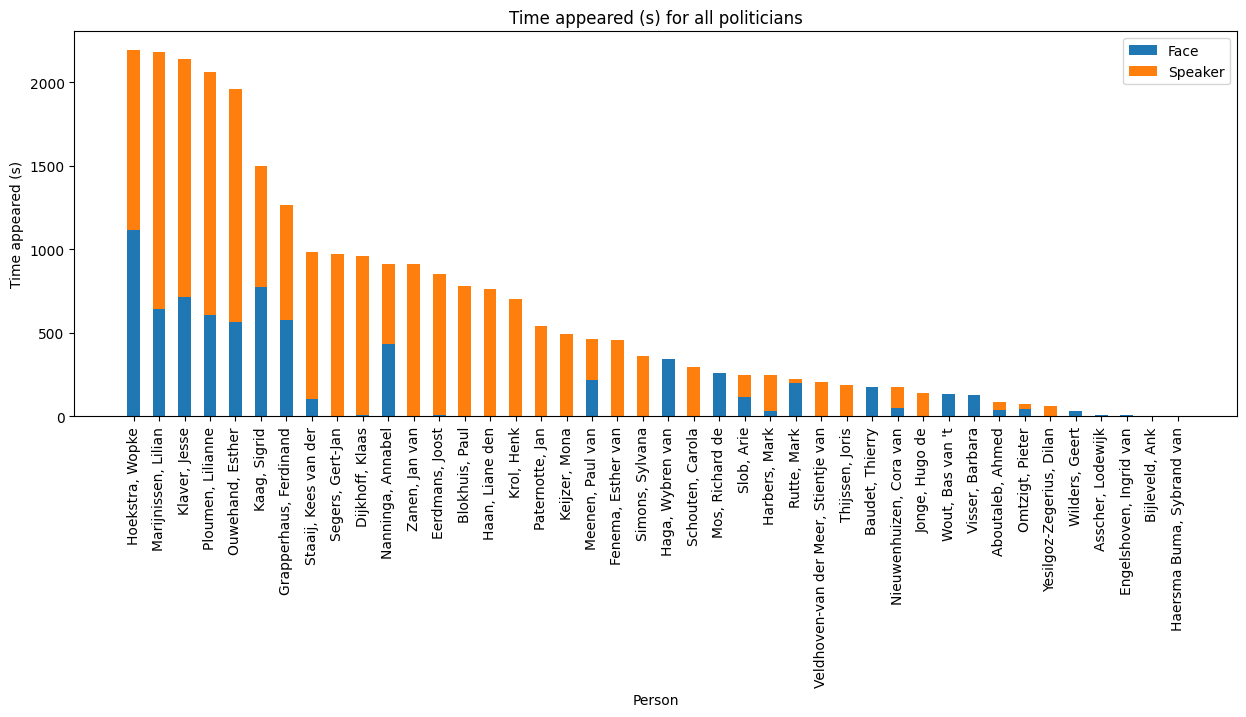

In [457]:
keysList, valuesLists = personAnalyser.calculateTimeBreakdownPerColumnValue("Name", ["Time face recognised (s)", "Time voice recognised (s)"], sortColumn="Total time recognised (s)")
namesList = ["Face", "Speaker"]
plotStackedBarChart(keysList, valuesLists, namesList, "Time appeared (s) for all politicians", "Person", "Time appeared (s)", True)

## Number of appearances per gender

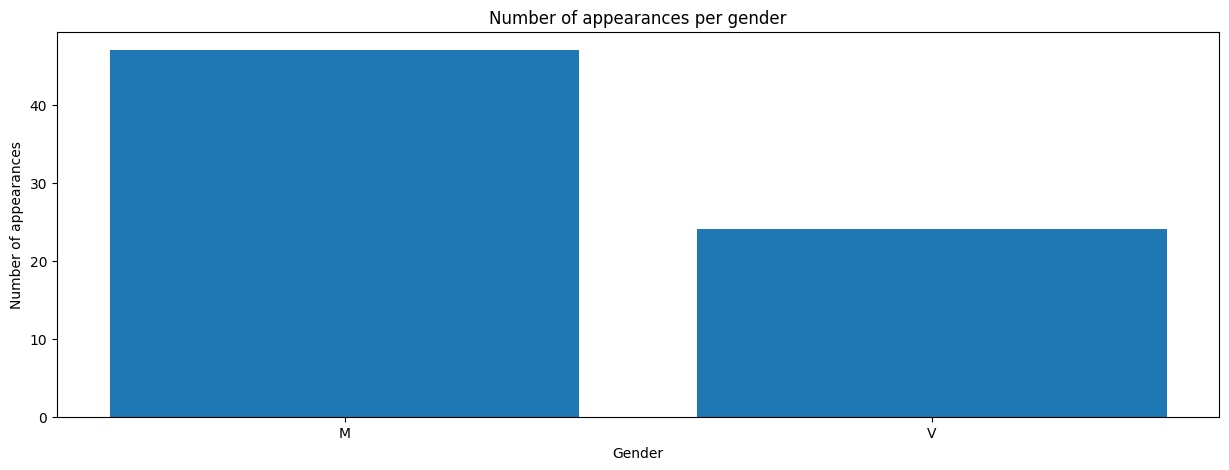

In [458]:
category = "Gender"
categoryLabel = "gender"
genders, counts = plotAppearancesPerCategoryValue(category, categoryLabel, False)
maleAppearanceCounts = counts[genders.index("M")]   
femaleAppearanceCounts = counts[genders.index("V")]  

## Average onscreen time per gender

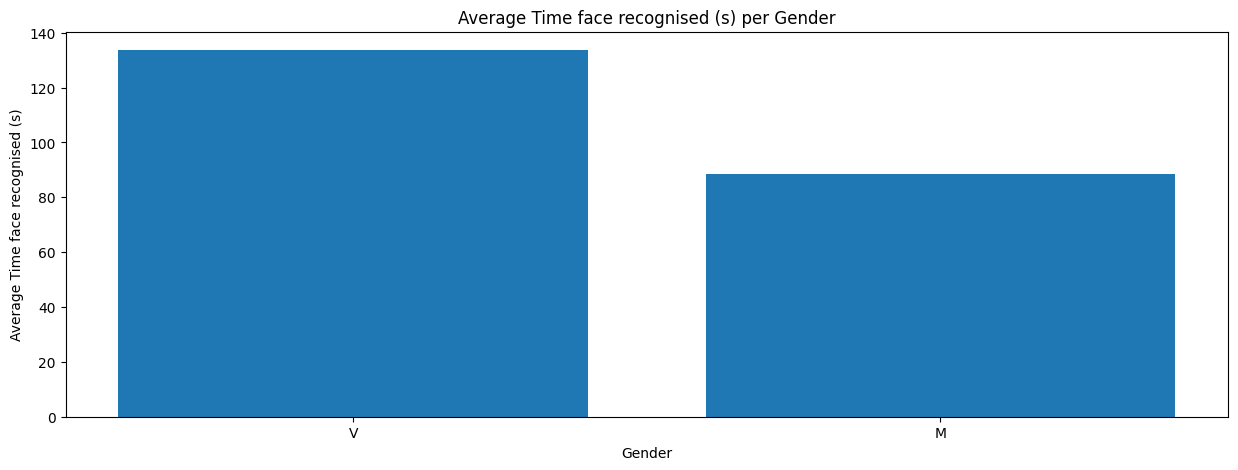

In [459]:
valueLabel = "Time face recognised (s)"
category = "Gender"
categoryLabel = "Gender"
genders, averages = plotAveragesPerCategoryValue(valueLabel, category, categoryLabel, False)


## Average speaking time per gender

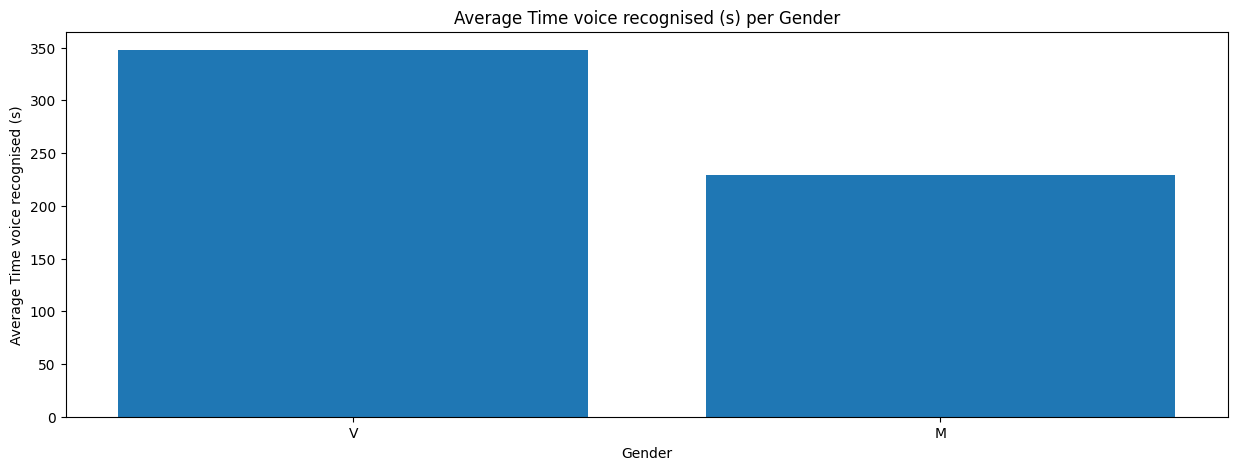

In [460]:
valueLabel = "Time voice recognised (s)"
category = "Gender"
categoryLabel = "Gender"
genders, averages = plotAveragesPerCategoryValue(valueLabel, category, categoryLabel, False)


## Speaking time along the political spectrum

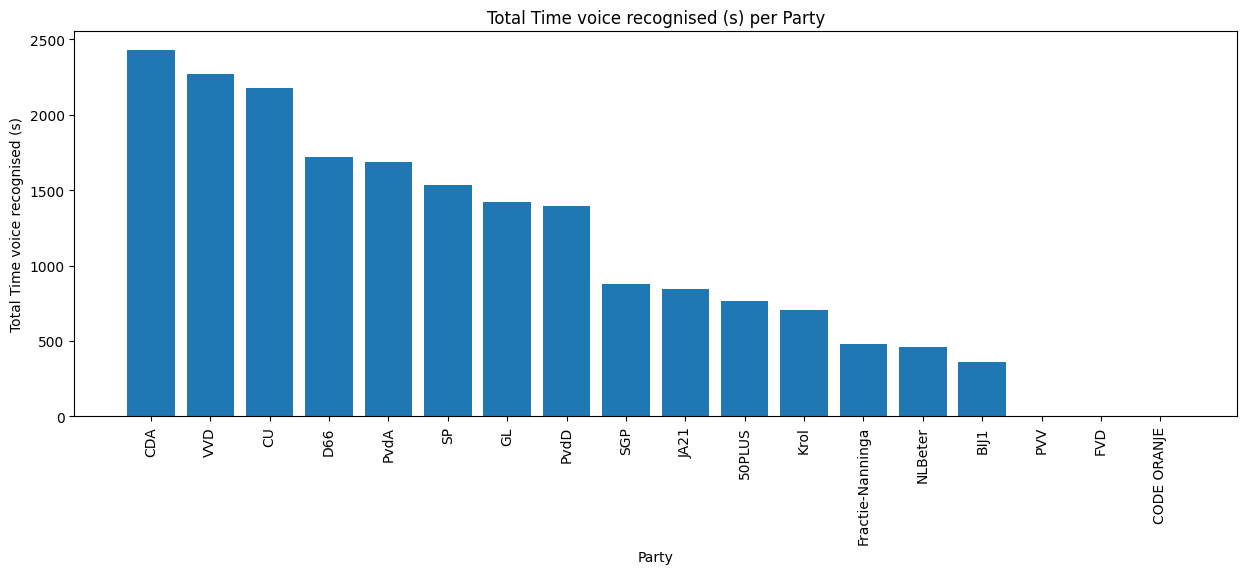

In [461]:
valueLabel = "Time voice recognised (s)"
category = categoryLabel = "Party"
parties, partyTimes = plotTotalsPerCategoryValue(valueLabel, category, categoryLabel, True)


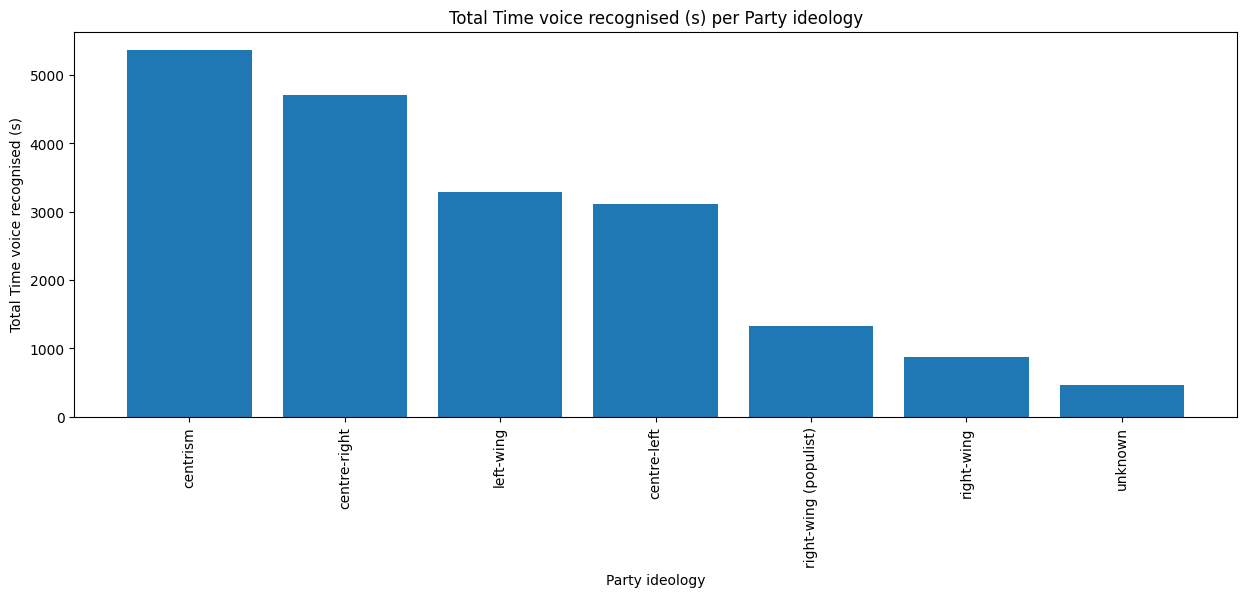

In [462]:
valueLabel = "Time voice recognised (s)"
category = categoryLabel = "Party ideology"
ideologies, ideologyTimes = plotTotalsPerCategoryValue(valueLabel, category, categoryLabel, True)